In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Mínimos Quadrados 

## Carl Friedrich  Gauss

Gauss foi um desses gênios que passaram aqui na terra. Um matemático, físico e astrômo que contribuiu e muito em varias áreas da ciência e engenharia. Ele foi apelidado como o príncipe da matemática. E seus descobrimentos são usados até hoje nos metodos de otimização e estatistica. O mais conhecido e que vamos estudar é o Método dos Mínimos Quadrados. 

## Caixa Extraterrestre

Vamos supor que um morador da cidade de Varginha estivesse andando pela cidade e tropeçasse em uma caixa estranha. Essa caixa é de um material que ninguém conhece. Ela é indestrutível e impossível de ser aberta. O morador observa essa caixa e descobre algo que se parece com um conector de entrada. Se ele não consegue abrir essa caixa, como que ele vai saber o que essa caixa faz? 

Aparentemente essa caixa é bem leve embora seu material ser extremamente resistente e duro. Com certeza não é de nenhum material conhecido. Eu teria que pensar o que eu poderia colocar como uma entrada para que ela me retorne uma resposta. Uma entrada possível seria jogar essa caixa no chão com toda minha força. No momento, essas são as minhas únicas ferramentas. A entrada seria a minha força somanda com a força peso da caixa. A saída esperada seria uma deformação da caixa ao colidir com o chão. Porém nada aconteceu com a caixa.

Eu sou um cientista e decido levar essa caixa para um laboratório. Lá eu realizo entradas mais precisas para essa caixa. Faço todos os teste de força para ver se eu consigo alguma saída. Mas sem sucesso. Concluo que com as ferramentas existentes no labaratório eu não consigo deformar a caixa. 

Depois de fazer todos os testes de resistência. Eu observo novamente essa caixa e reparo o que parece ser um conector elétrico. Aplico uma tensão elétrica na entrada. Vejo uma fluxo luminoso nessa caixa. Sabendo disso, eu aplico varios valores de tensão na entrada e verifico se o fluxo luminoso muda. Guardo os valores de tensão no vetor x e o de luminosidade em y.

$$ x_{nx1} = \begin{vmatrix}x_1 \\ ...\\ x_n \end{vmatrix} \quad y_{nx1} = \begin{vmatrix}y_1 \\ ...\\ y_n \end{vmatrix}  $$

In [3]:
dados = pd.read_csv('caixa.csv')
dados

,x_volt,y_lm
0,10,-9975.530825
1,12,5533.646693
2,14,761.023172
3,16,20245.782889
4,18,2656.569042
5,20,17246.190378
6,22,2837.426231
7,24,8689.808312
8,26,21207.007780
9,28,15697.892940


Com esses dados em mãos, construo um gráfico para ver seu comportamento.

Text(0.5, 0, 'Tensão [v]')

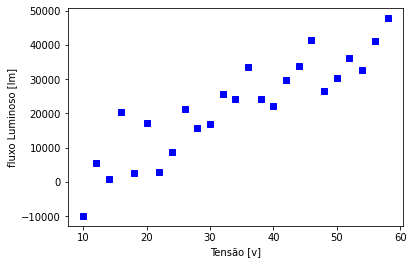

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(dados['x_volt'],dados['y_lm'],'bs')
ax.set_ylabel('fluxo Luminoso [lm]')
ax.set_xlabel('Tensão [v]')


Aparentemente podemos visualisar uma correlação linear positiva  entre a tensão e o fluxo luminoso. Mas não podemos afirmar só olhando para o gráfico já que existe uma variância nas medições. Para descobrir se exite uma correlação entre os dados podemos usar uma medida de correlação.

In [5]:
dados.corr()


,x_volt,y_lm
x_volt,1.000000,0.895976
y_lm,0.895976,1.000000


A correlação é um valor entre -1 e 1. O sinal negativo nos diz se a correlação é positiva ou negativa. Quanto mais próximo de 1 menor será a variância. Entretando de a covariação for igual a 0, é sinal que não existe correlação entre os dados. 

Sabemos que exite existe uma correlação entre o fluxo luminoso e a tensão aplicada na caixa. Podemos achar a função f(x) que se comporta examente como a caixa?

$$ f(x) = \quad ?$$

Vamos supor que f(x) seja uma reta com um coeficiente angular m e um coeficiente linear b. Essa reta ideial vou chamar de y(x). Com os dados que eu coletei da caixa eu consigo aproximar ao máximo dessa reta. Porém sempre existira um erro. Essa reta vou chamar de Z(X) e queremos descobrir qual é seu coeficiente angular $\theta_1$ e seu coeficiente linear $\theta_2$.

$$Z(X)= \theta_1 X + \theta_2 \quad y(x) = mx + b $$ 

A melhor maneira de descobrirmos os valores de $\theta_1$ e $\theta_2$ é trabaramos com matrizes. Rearranjando Z(X) conseguimos isolar $\theta_1$ e $\theta_2$ em um vetor $\Theta$

$$Z_{[nx1]} = \theta_1 \begin{vmatrix}x_1 \\ ...\\ x_n \end{vmatrix} + \theta_2 = \begin{vmatrix} \theta_1 x_1 + \theta_2 \\...\\ \theta_1 x_n+\theta_2 \end{vmatrix} = \begin{vmatrix} x_1 & 1\\... & ...\\x_n & 1 \end{vmatrix} \begin{vmatrix} \theta_1 \\ \theta_2\end{vmatrix}$$

A ideia genial de Gauss vem agora. Ele pensou qual são os valores de $\Theta$ que minimizam ao máximo o erro entre a reta que eu quero achar e a reta ideal da caixa. 

$$\Theta = \begin{vmatrix}
\theta _1 \\ 
\theta _2 
\end{vmatrix}$$

$$ E = y - z$$

In [6]:
a = 830
b = -6600
x = np.array(range(10,60,2))
y = a*x+b# lm

<function matplotlib.pyplot.show(close=None, block=None)>

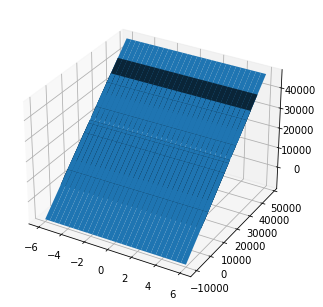

In [30]:
x_plot = np.arange(0,60,10)
y_plot = np.arange(0,6000,1000)

X,Y = np.meshgrid(y,dados['y_lm'])

Z = X + Y

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_surface(X,Y,Z)
plt.show


O erro mostrado no gráfico é um plano inclinado com uma grande e considerável numero de pontos. Testar cada um desses pontos para ver qual tem o menor erro é uma tarefa muito onerosa. Gaus então pensou, e se eu elevasse ao quadrado a função de erro.

$$E(\Theta) = (y-z)^{2} $$

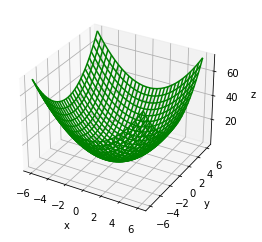

In [29]:

def z_function(x, y):
    return x ** 2 + y ** 2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

Agora obseva-se uma função quadrática. Ela agora possui um ponto de mínimo. Para encontrar o ponto de mínimo dessa função basta deriva e iguala a zero que lá está o ponto com o menor erro possível   

$$\frac{\partial E}{\partial \Theta}=0$$

### Regra da Cadeia 

Derivamos a função quadrática do erro em relação a $\Theta$. Porém para fazer essa derivada precisamos realizar a regra da cadeia.  

$$\frac{\partial E}{\partial \Theta}=\frac{\partial (y-z)^{2}}{\partial \Theta}$$

$$\frac{\partial E}{\partial \Theta}=\frac{\partial E}{\partial z}\cdot \frac{\partial z}{\partial \Theta}$$

$$\frac{\partial E}{\partial z} = -2(y-z)_{[n\times 1]}$$

$$\frac{\partial z}{\partial \Theta} = X^{T}_{[2\times n]}$$

$$\frac{\partial E}{\partial \Theta} = -2X^{T}_{[2\times n]}(y-z)_{[n\times 1]}$$

Com a deriada em mão,podemos fazer as subistituição de z por $X\Theta$. Rearanjando a equação respeitando a álgebra e igualando a derrivada a zero chegamos da formula do método dos mínimos quadrados.

$$\frac{\partial E}{\partial \Theta} = -2X^{T}_{[2\times n]}(y-X\Theta)_{[n\times 1]}$$

$$\frac{\partial E}{\partial \Theta} = -2(X^{T}y - X^{T}X\Theta)$$

$$\Theta  = (X^{T}\cdot X)^{-1}X^{T}y$$

# Função Método dos Mínimos Quadrados

In [9]:
def mmq(x,y):
    Mx = np.matrix([x, np.ones(len(x))])
    M = Mx @ Mx.T
    Minv = np.linalg.inv(M)
    return Minv @ Mx @ y
                   

## Obtendo o Coeficiente Angular e Linear da Reta

In [10]:
theta1, theta2 = mmq(dados['x_volt'],dados['y_lm'])


## Achando os valoes de y para essa nova reta

In [11]:
dados['y_mmq'] = theta1*dados['x_volt'] + theta2

In [12]:
dados

,x_volt,y_lm,y_mmq
0,10,-9975.530825,1134.888013
1,12,5533.646693,2876.075532
2,14,761.023172,4617.263050
3,16,20245.782889,6358.450569
4,18,2656.569042,8099.638088
5,20,17246.190378,9840.825607
6,22,2837.426231,11582.013125
7,24,8689.808312,13323.200644
8,26,21207.007780,15064.388163
9,28,15697.892940,16805.575681


## Pontando a reta encontrada pelo método de Mínimos Quadrados 

Text(0.5, 0, 'Tensão [v]')

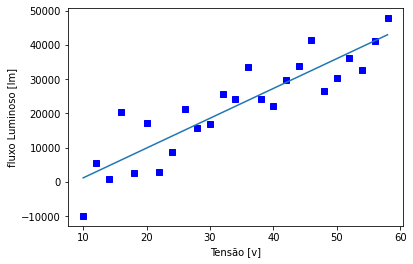

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(dados['x_volt'],dados['y_lm'],'bs')
ax.plot(dados['x_volt'],dados['y_mmq'])
ax.set_ylabel('fluxo Luminoso [lm]')
ax.set_xlabel('Tensão [v]')

In [14]:
import statsmodels.api as sm

In [15]:
Y = dados['y_lm']
X = sm.add_constant(dados['x_volt'])

In [17]:
resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                   y_lm   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     93.62
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           1.42e-09
Time:                        09:49:05   Log-Likelihood:                -253.88
No. Observations:                  25   AIC:                             511.8
Df Residuals:                      23   BIC:                             514.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7571.0496   3323.113     -2.278      0.0

# Conclusão

Existe uma correlação entre a tensão aplicada na caixa e o fluxo luminoso. No teste de correlação teve um valor de  0.90 aproximadamente. Na aproximação da Reta por mínimos quadrados teve um erro padrão de 3323,11 lm na estimativa do coeficiente linear e 90 no coeficiente angular. Ou seja, pelo valor P a reta está bem proxíma da reta ideal da caixa. Com isso podemos inferir que o objeto encontrado poderia ser ultilizado talvez como uma lanterna, porem mas estudos ainda precisam ser feitos para determinar outras propriedades da caixa.


# Referências 

https://pt.wikipedia.org/wiki/Incidente_de_Varginha

https://pt.wikipedia.org/wiki/Carl_Friedrich_Gauss

https://pt.wikipedia.org/wiki/M%C3%A9todo_dos_m%C3%ADnimos_quadrados